In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
MFCC = np.load('../data/GPCC.npy')
MFGP = np.load('../data/GPGP.npy')
STCC = np.load('../data/STGPCC.npy')
STGP = np.load('../data/STGPGP.npy')

In [3]:
#Calculate MAE
#Multifidelity MAE
MFerr = np.abs(MFCC-MFGP)
print(np.mean(MFerr))
print(np.std(np.abs(MFerr))/np.sqrt(len(MFerr)))
#Standard MAE
STerr = np.abs(STCC-STGP)
print(np.mean(np.abs(STerr)))
print(np.std(np.abs(STerr))/np.sqrt(len(STerr)))

0.7803271048185806
0.06152851876180528
1.3533122877361095
0.17043346540762272


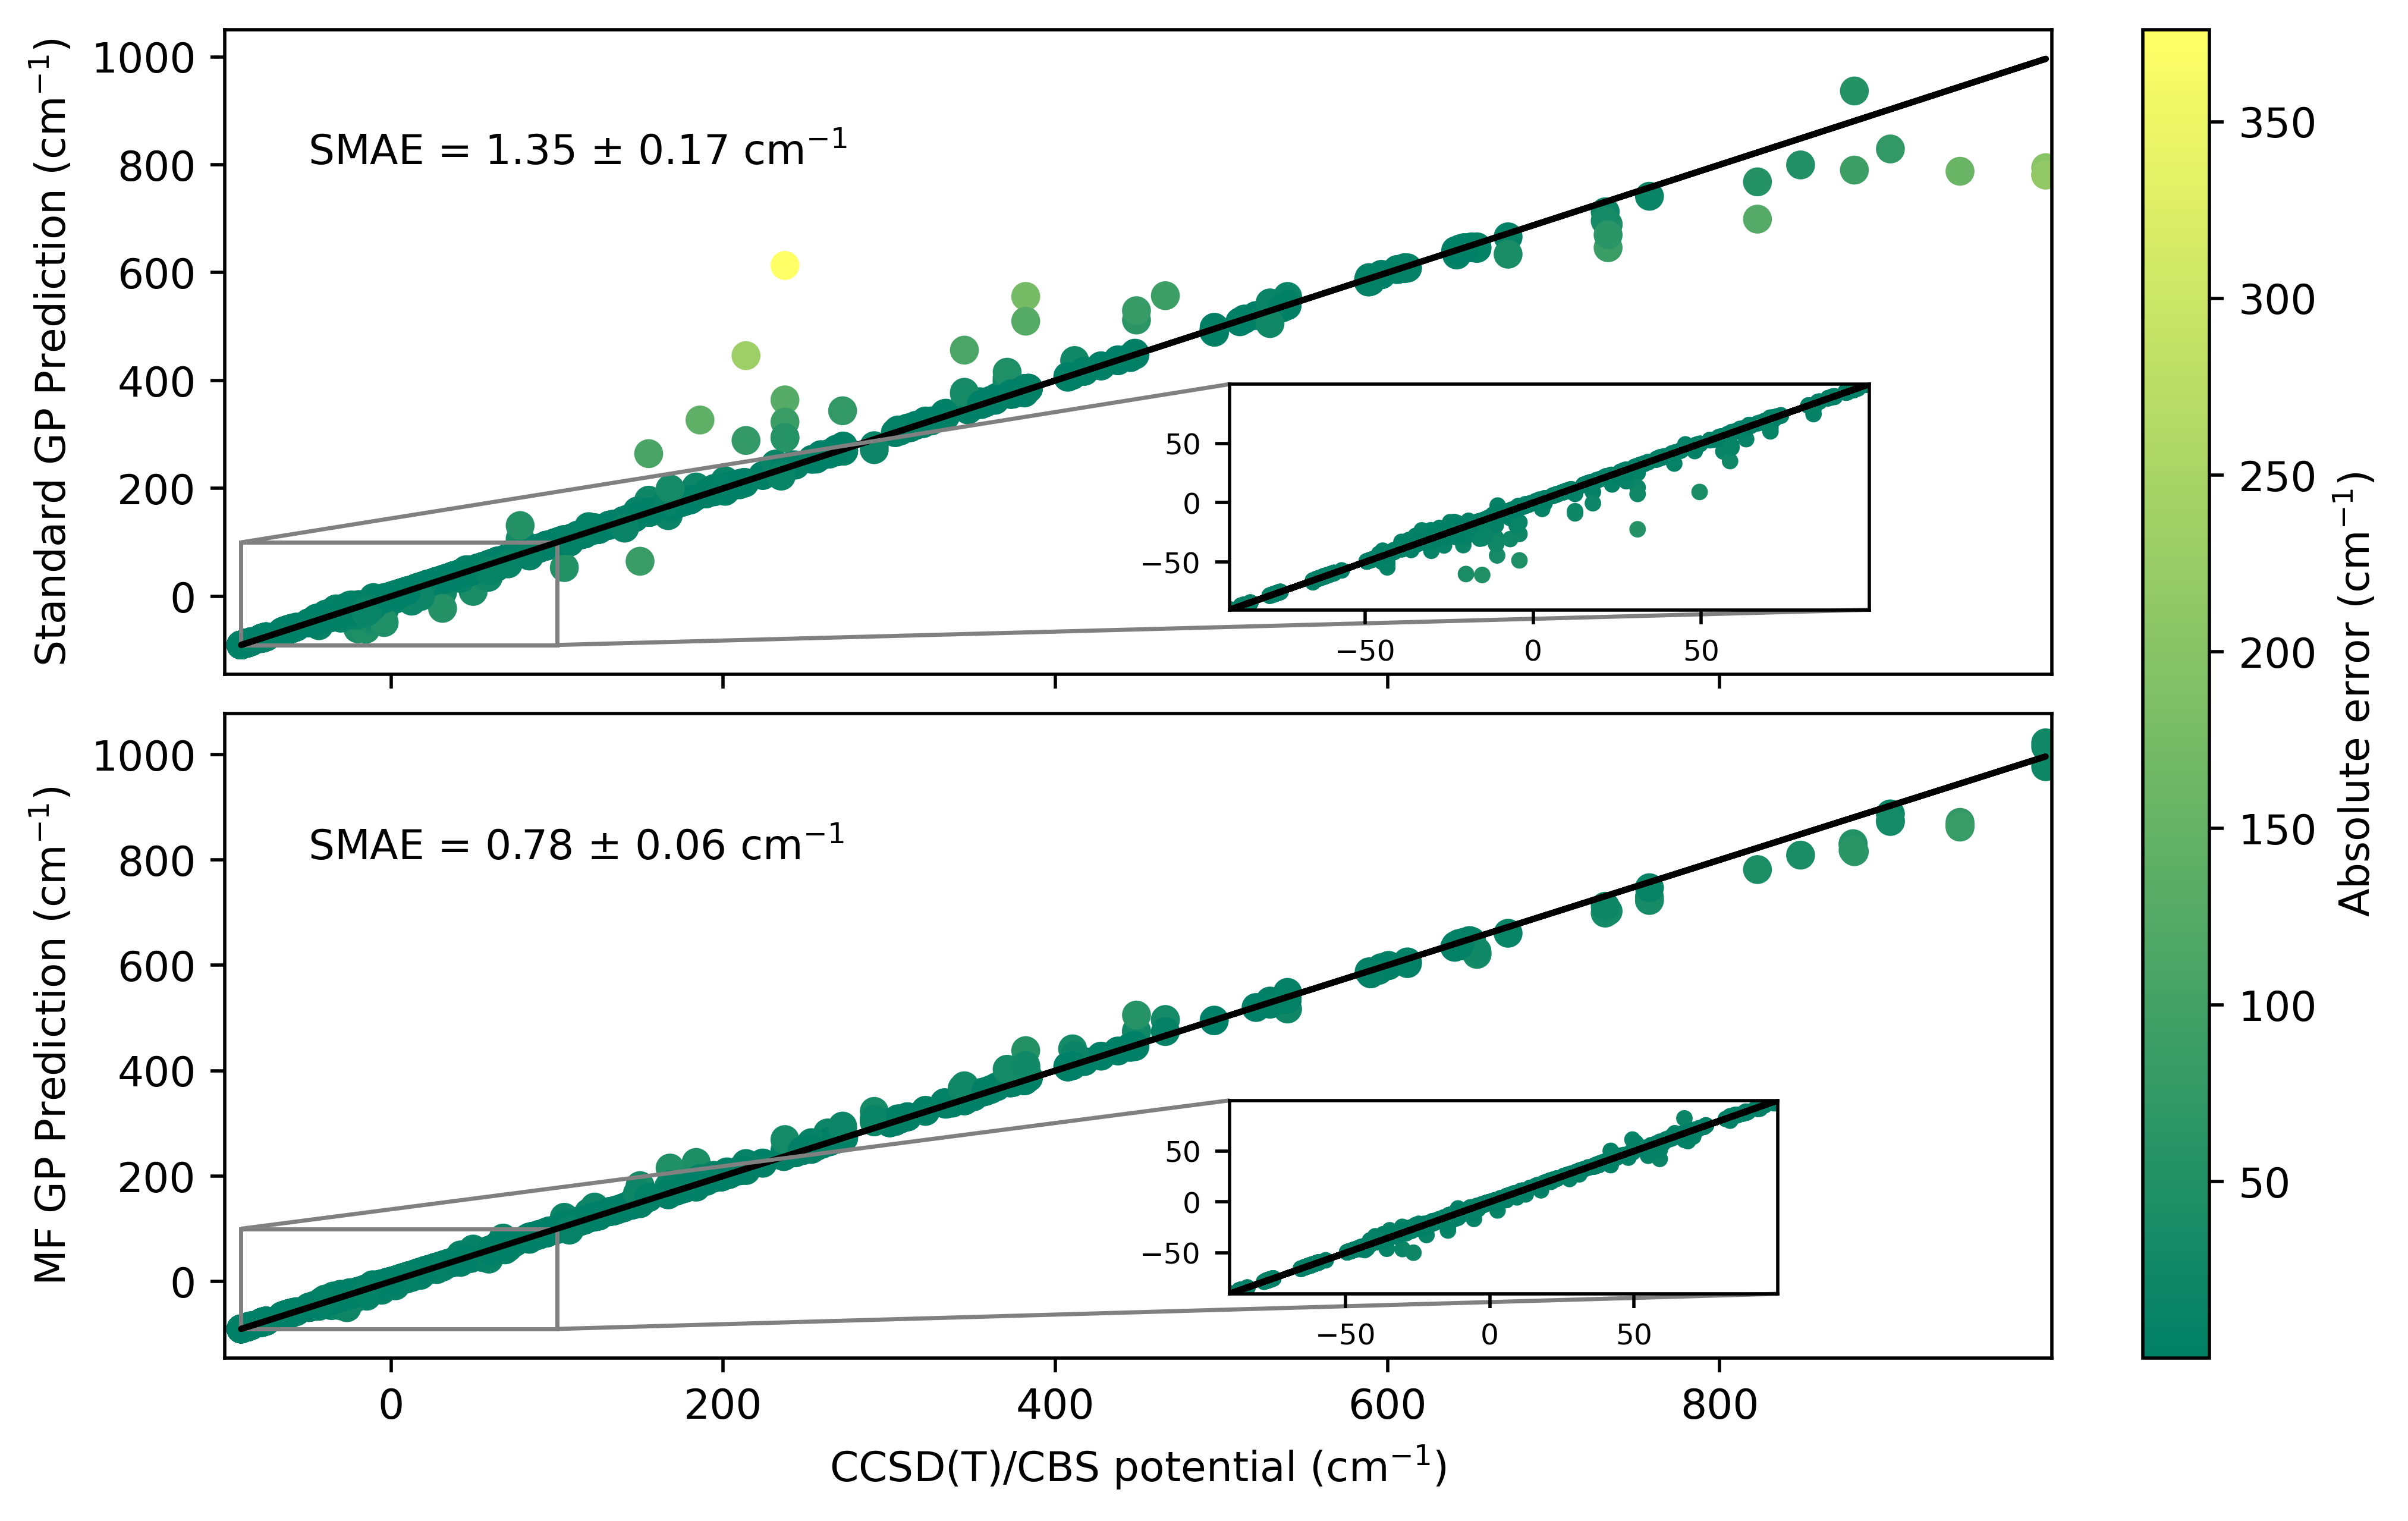

In [5]:
fig,axs = plt.subplots(2,1,figsize=(8,5), sharex=True, constrained_layout=True)
plt.gcf().set_dpi(500)
vmin = min(STerr.min(), MFerr.min())
vmax = max(STerr.max(), MFerr.max())
norm = colors.Normalize(vmin=vmin, vmax=vmax)
cmap = 'summer'
sc1 = axs.flat[1].scatter(MFCC,MFGP,c=MFerr,norm=norm,cmap=cmap)
axs.flat[1].plot(STCC, STCC, color='k')
#Inset MF
axins1 = axs.flat[1].inset_axes([0.55, 0.1, 0.3, 0.3])#Inset MF
axins1.scatter(MFCC, MFGP, c=MFerr, norm=norm, cmap=cmap,marker='.')
axins1.plot(MFCC, MFCC, 'k-')
axins1.set_xlim(MFCC.min(), 99.9)
axins1.set_ylim(MFGP.min(), 99.9)
axins1.tick_params(labelsize=7)
mark_inset(axs.flat[1], axins1, loc1=2, loc2=4, fc="none", ec="0.5")

sc0 = axs.flat[0].scatter(STCC,STGP,c=STerr,norm=norm,cmap=cmap)
axs.flat[0].plot(STCC,STCC,'k-')
#Inset ST
axins0 = axs.flat[0].inset_axes([0.55, 0.1, 0.35, 0.35])
axins0.scatter(STCC,STGP,c=STerr,norm=norm,cmap=cmap,marker='.')
axins0.plot(STCC,STCC, 'k-')
axins0.set_xlim(STCC.min(), 99.9)
axins0.set_ylim(STGP.min(), 99.9)
axins0.tick_params(labelsize=7)
mark_inset(axs.flat[0], axins0, loc1=2, loc2=4, fc="none", ec="0.5")

axs.flat[1].set_ylabel('MF GP Prediction (cm$^{-1}$)')
axs.flat[0].text(-50,800,r'SMAE = 1.35 $\pm$ 0.17 cm$^{-1}$') 
axs.flat[0].set_ylabel('Standard GP Prediction (cm$^{-1}$)')
axs.flat[1].set_xlabel('CCSD(T)/CBS potential (cm$^{-1}$)')
axs.flat[1].text(-50,800,r'SMAE = 0.78 $\pm$ 0.06 cm$^{-1}$')
axs.flat[1].set_xlim(-100,999.9)
cbar = fig.colorbar(sc1, ax=axs, orientation='vertical', fraction=.1)
cbar.ax.set_ylabel(r'Absolute error (cm$^{-1}$)', rotation=90)
plt.savefig('../figures/MAEComparison.svg')